In [1]:
#Importing Packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Checking Tensorflow version
print(tf.__version__)

2.1.1


In [2]:
#Loading data from keras API
(X_train, y_train ), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 14s 1us/step


In [42]:
#Length of train values
len(X_train)

60000

In [41]:
len(X_test)

10000

In [45]:
#Shape of X_train
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

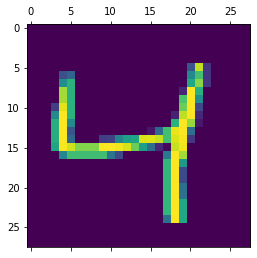

In [8]:
#Viewing the values in train
plt.matshow(X_train[2])

In [9]:
X_train.shape

(60000, 28, 28)

In [17]:
#Scaling the values
X_train = X_train/255
X_test = X_test/255

In [18]:
#Flattening to single layer stack
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
print(X_test_flattened.shape)

(10000, 784)


In [19]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
#Creating a simple model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

model.fit(X_train_flattened, y_train, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4866 - accuracy: 0.8786
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3059 - accuracy: 0.9154
Epoch 3/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2855 - accuracy: 0.9206
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2750 - accuracy: 0.9239
Epoch 5/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2676 - accuracy: 0.9263
Epoch 6/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2626 - accuracy: 0.9271
Epoch 7/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2589 - accuracy: 0.9288
Epoch 8/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2554 - accuracy: 0.9296
Epoch 9/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2529 - accuracy: 0.9305
Epoch 10/10
60

In [21]:
#Evaluating the model performance using test values
model.evaluate(X_test_flattened, y_test)

10000/10000 [==============================] - 1s 89us/sample - loss: 0.2616 - accuracy: 0.9282


[0.26156347406804564, 0.9282]

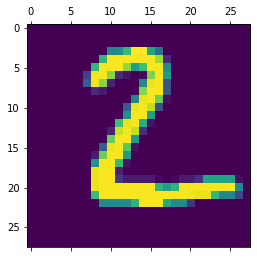

In [27]:
plt.matshow(X_test[1])

In [26]:
#Predicting the values
y_pred = model.predict(X_test_flattened)
y_pred[1]

array([1.3770623e-04, 7.8728397e-07, 6.9013935e-01, 3.1738229e-05,
       1.9904908e-15, 3.2143430e-03, 2.4363897e-03, 1.7955062e-19,
       3.3673066e-05, 1.3597800e-16], dtype=float32)

In [28]:
np.argmax(y_pred[1])

2

In [30]:
#Printing indices of array
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels[:5])

[7, 2, 1, 0, 4]


In [32]:
#confusion matrix
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    7,    6,    2,    3,    0],
       [   0, 1106,    5,    2,    0,    1,    4,    2,   15,    0],
       [   3,    7,  928,   14,    8,    5,   12,    9,   43,    3],
       [   2,    0,   20,  916,    1,   29,    2,    9,   25,    6],
       [   1,    1,    5,    1,  929,    0,    7,    4,    8,   26],
       [   6,    2,    1,   27,   10,  794,   12,    4,   32,    4],
       [  10,    3,    9,    1,    7,   18,  906,    1,    3,    0],
       [   1,    6,   25,    4,   10,    2,    0,  941,    2,   37],
       [   4,    6,    6,   14,    9,   31,    7,    6,  883,    8],
       [   9,    7,    1,    7,   32,    8,    0,   14,   10,  921]])>

In [33]:
#creating a model with one hidden layer 
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

model.fit(X_train_flattened, y_train, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2922 - accuracy: 0.9176
Epoch 2/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1371 - accuracy: 0.9601
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0988 - accuracy: 0.9710
Epoch 4/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0779 - accuracy: 0.9763
Epoch 5/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0633 - accuracy: 0.9809
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0520 - accuracy: 0.9837
Epoch 7/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0432 - accuracy: 0.9869
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0370 - accuracy: 0.9889
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0320 - accuracy: 0.9904
Epoch 10/10
60

In [34]:
model.evaluate(X_test_flattened, y_test)

10000/10000 [==============================] - 1s 53us/sample - loss: 0.0816 - accuracy: 0.9752


[0.08156320858114632, 0.9752]

In [37]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    7,    6,    2,    3,    0],
       [   0, 1106,    5,    2,    0,    1,    4,    2,   15,    0],
       [   3,    7,  928,   14,    8,    5,   12,    9,   43,    3],
       [   2,    0,   20,  916,    1,   29,    2,    9,   25,    6],
       [   1,    1,    5,    1,  929,    0,    7,    4,    8,   26],
       [   6,    2,    1,   27,   10,  794,   12,    4,   32,    4],
       [  10,    3,    9,    1,    7,   18,  906,    1,    3,    0],
       [   1,    6,   25,    4,   10,    2,    0,  941,    2,   37],
       [   4,    6,    6,   14,    9,   31,    7,    6,  883,    8],
       [   9,    7,    1,    7,   32,    8,    0,   14,   10,  921]])>

In [38]:
#Creating a model 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

model.fit(X_train, y_train, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2904 - accuracy: 0.9194
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1367 - accuracy: 0.9597
Epoch 3/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0976 - accuracy: 0.9715
Epoch 4/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0767 - accuracy: 0.9769
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0635 - accuracy: 0.9804
Epoch 6/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0524 - accuracy: 0.9843
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0439 - accuracy: 0.9863
Epoch 8/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0367 - accuracy: 0.9887
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0308 - accuracy: 0.9905
Epoch 10/10
60